In [3]:
#we are Importing required packages for our problem
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import scipy.stats as stats
    import seaborn as sns
    from sklearn.preprocessing import MinMaxScaler,StandardScaler,Normalizer
#     import scipy.cluster.hierarchy as sch
#     from scipy.cluster.hierarchy import linkage
#     from sklearn.cluster import AgglomerativeClustering
    from feature_engine.outliers import Winsorizer
except Exception as e:
    print(e)
else:
    print('required liberaries imported')

required liberaries imported


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
EastWestAirline = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [8]:
EastWestAirline.shape

(3999, 12)

In [10]:
EastWestAirline = EastWestAirline.rename(columns={'ID#':'ID','Award?':'Award'})

In [11]:
EastWestAirline.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [12]:
EastWestAirline.columns

Index(['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

__EDA__

In [13]:
# writing loop to check datatype other than integer, if found any that will be replaced by Nan.

def column_preprocessor(df):
    count = 0
    for row in df:
        try:
            if type(row) != int:
                df.loc[count] = np.nan
        except:
            pass
        count +=1

In [14]:
column_preprocessor(EastWestAirline[EastWestAirline.columns])

In [15]:
EastWestAirline.isna().any().sum()

0

In [17]:
EastWestAirline.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


In [ ]:

# Previously miles award status

dataset['Award'].value_counts().plot(kind='pie', autopct='%2.0f%%', fontsize='18', 
                                        colors = ['#F11A05','#43E206'], shadow =True)
plt.show()

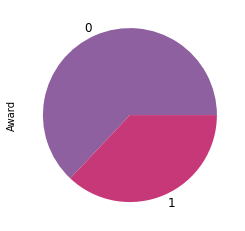

In [19]:
EastWestAirline['Award'].value_counts().plot(kind = 'pie',fontsize='12',colors=['#8e609f','#c73879'])
plt.show()

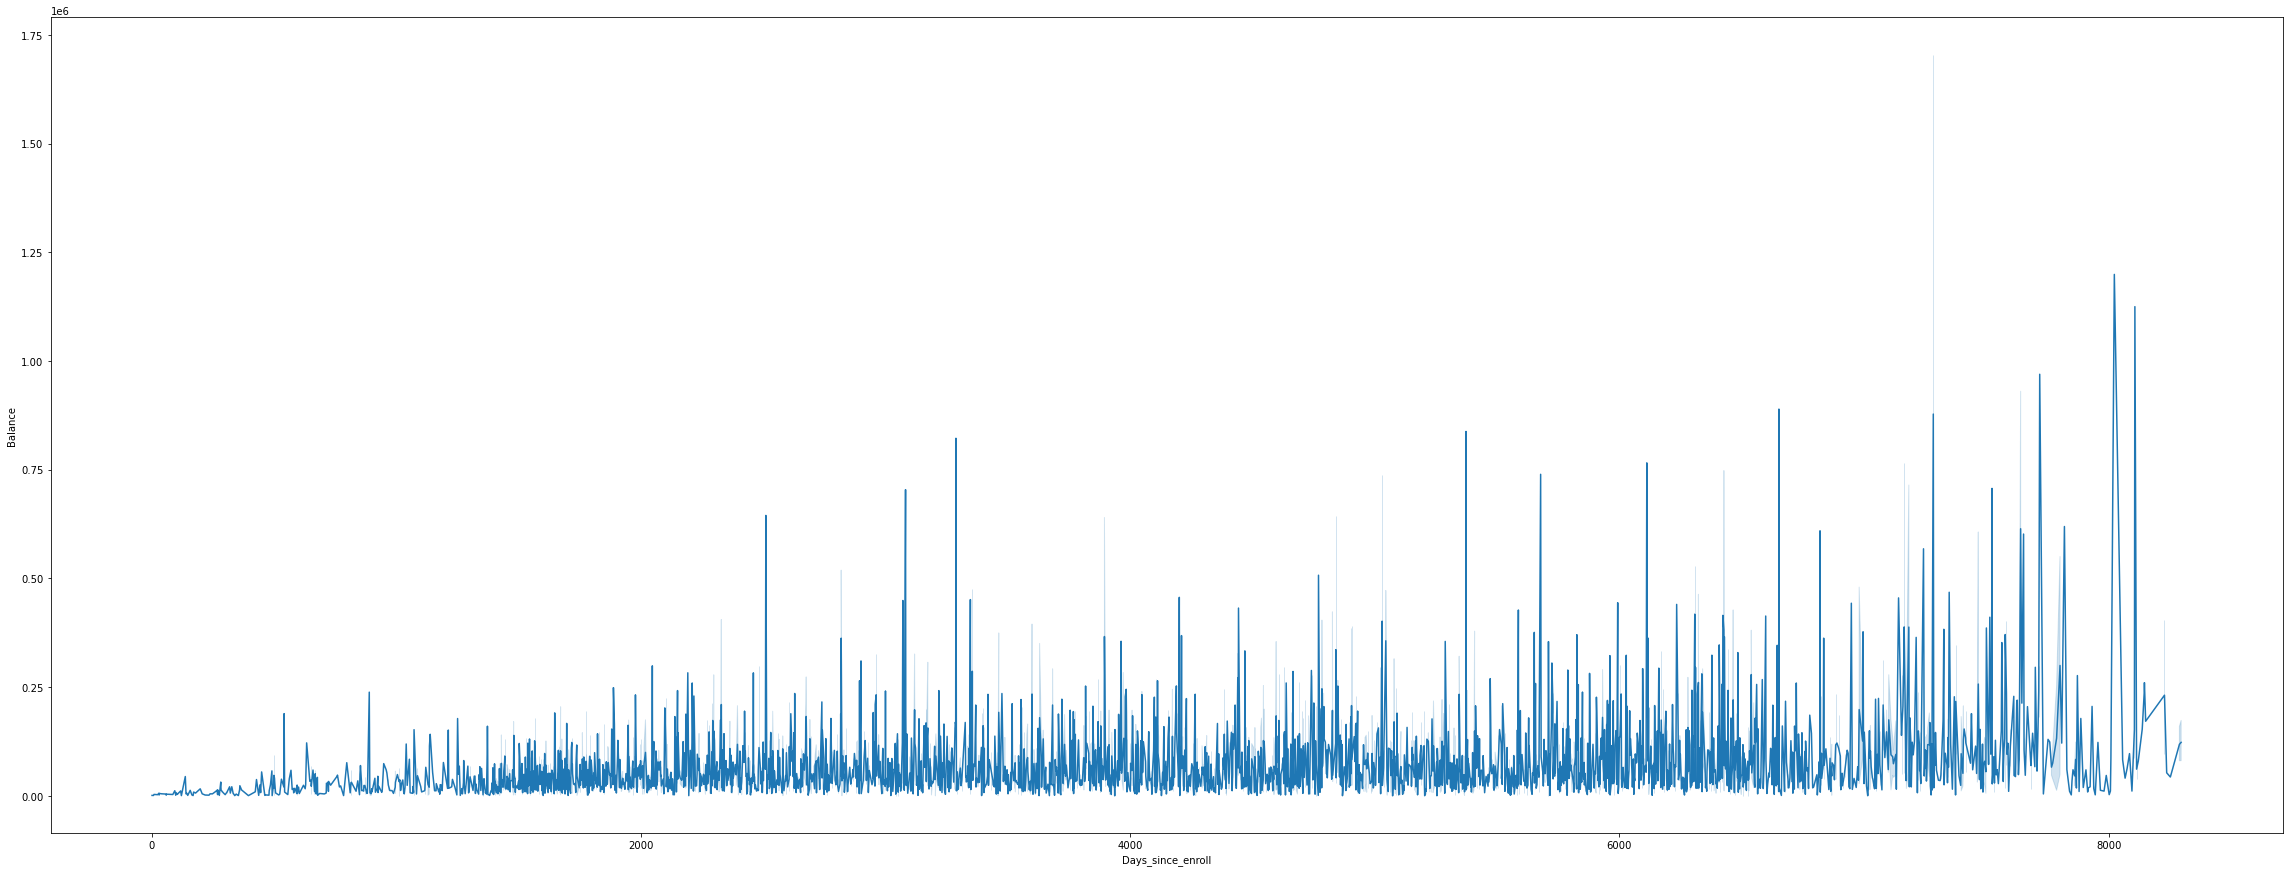

In [23]:
#most of the customers not awarded hence we can drop Award col
# Checking trend between balance miles & no. of days since enroll
fig, ax = plt.subplots(figsize =(40,15))
ax = sns.lineplot(x= 'Days_since_enroll', y='Balance',data = EastWestAirline)

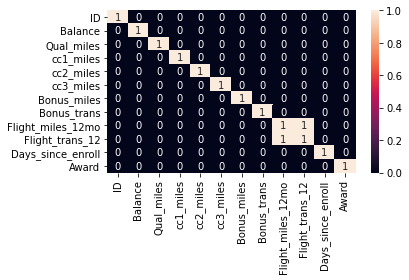

In [25]:
#as days enroll increases mile balance 
sns.heatmap(EastWestAirline.corr()>0.85,annot=True)
plt.tight_layout()

In [ ]:
# Since there is no correlation between variables

In [26]:
EWA_df = EastWestAirline.drop(['ID','Award'],axis=1)

In [40]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler #transform using standerdisation


In [ ]:
 EWA_df_std = StandardScaler().fit_transform(EWA_df)

In [39]:
EWA_df_std.shape

(3999, 10)

In [30]:
from sklearn.decomposition import PCA
pca = PCA(random_state=10, n_components=10)
X_reduced = pca.fit_transform(EWA_df_std)

In [32]:
import pickle
file = 'pca'
outfile = open(file,'wb')
pickle.dump(X_reduced,outfile)
outfile.close()

In [33]:
#transform using MinMaxScaler

In [41]:
minmax = MinMaxScaler()

In [43]:
minmax_df = minmax.fit_transform(EWA_df)
minmax_df.shape

(3999, 10)

In [45]:
#pca for EWA_df_std
pca_std = PCA(random_state=10,n_components = 0.95)
pca_std_df =  pca_std.fit_transform(EWA_df_std)

In [47]:
pca_std_df.shape

(3999, 8)

In [48]:
pca_std.singular_values_ ## eigenvalues..

array([110.44189995,  83.11377294,  64.82616793,  63.48944763,
        61.96605949,  60.17942085,  51.82140955,  38.09870033])

In [49]:
# variance containing in each formed PCA
pca_std.explained_variance_ratio_*100

array([30.50115845, 17.27406665, 10.5087073 , 10.07979485,  9.60188179,
        9.05617078,  6.71532505,  3.62968484])

In [50]:
# Cummulative variance ratio..

# this will give an idea of, at how many no. of PCAs, the cummulative addition of
#........variance will give much information..

cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)

In [52]:
len(cum_variance)

8

In [ ]:
#by applying PCA on standardized data with 95% variance it gives 8 PCA components.

In [54]:
#pca on minmax
pca_minmax = PCA(random_state=10,n_components = 0.95)

In [55]:
pcs_minmax_df =  pca_std.fit_transform(minmax_df)

In [56]:
pcs_minmax_df.shape #by applying PCA on MinMaxscalr transformation data gives 5 PCA components.

(3999, 5)

In [68]:
pcs_minmax_df 

array([[-0.18703213,  0.41266243, -0.07648828, -0.00529279, -0.0028598 ],
       [-0.18610737,  0.40820716, -0.06922368, -0.00313584, -0.00648617],
       [-0.17547713,  0.41431082, -0.04958389, -0.00076815, -0.01021099],
       ...,
       [ 0.12324369, -0.37735626, -0.08370618, -0.00512705,  0.01153869],
       [-0.37049417, -0.23488696, -0.04153639, -0.01735555,  0.00594571],
       [-0.37564393, -0.23577567, -0.07018784, -0.00993757,  0.00515938]])

In [70]:
#!pip install yellowbrick

In [72]:
from tqdm import tqdm
from yellowbrick.cluster import KElbowVisualizer

In [73]:
#we will initiate Kmeabs for two diff val
from sklearn.cluster import KMeans
model1 = KMeans(random_state=10, n_jobs = -1)
model2 = KMeans(random_state=10, n_jobs=-1, max_iter=500, n_init=20,)

In [76]:
##KElbowvisualizer with no of cluster and metric
visualizer1 = KElbowVisualizer(model1,k=(2,10), metric='distortion',timings=False)
visualizer2 = KElbowVisualizer(model2,k=(2,10), metric='silhouette',timings=True)


In [94]:
print('model1')
visualizer1.fit(pcs_std_df)
# visualizer1.poof()----this method is deparcated
visualizer1.show()



model1


In [128]:
print('model2')
visualizer2.fit(pcs_std_df)    
# visualizer2.poof()------this method is deparcated
visualizer2.show()

model2


<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [113]:
#Since we don't know true labels so we have used silhoutte score method to determine good k numbers based on score.
#before using KMeans clustering it is better to have discussion or decision on outliers.

In [114]:
from sklearn.metrics import silhouette_score

In [115]:
list1= [2,3,4,5,6,7,8,9]  # always start number from 2.

In [122]:
from tqdm.notebook import trange, tqdm


In [129]:
for n_clust in tqdm(list1):
    clust1 = KMeans(n_clusters=n_clust, random_state=0, n_jobs=-1)
    clust_label1 = clust1.fit_predict(pcs_std_df)
    silhouette_score1 = silhouette_score(pcs_std_df,clust_label1)
    print("For n_clust =", n_clust,"The average silhouette_score is :", silhouette_score1)

For n_clust = 2 The average silhouette_score is : 0.3639788167896175
For n_clust = 3 The average silhouette_score is : 0.34038142310682834
For n_clust = 4 The average silhouette_score is : 0.33811895596476305
For n_clust = 5 The average silhouette_score is : 0.34885887029453005
For n_clust = 6 The average silhouette_score is : 0.3665724589453308
For n_clust = 7 The average silhouette_score is : 0.26773101005827354
For n_clust = 8 The average silhouette_score is : 0.28284236665851537
For n_clust = 9 The average silhouette_score is : 0.2708765675709241



In [130]:
#By taking standardize data pca it gives number of cluster =6 with silhoette score = 0.36

In [135]:
#Taking MinMaxScalar transformation data & PCA applied on it.
model3 = KMeans(random_state= 0, n_jobs = -1)
model4 = KMeans(random_state=10, n_jobs=-1, max_iter=500, n_init=20)

In [136]:
visualizer3 = KElbowVisualizer(model3, k=(2,10),metric='silhouette', timings=True)

visualizer4 = KElbowVisualizer(model4, k=(2,10),metric='silhouette', timings=True)

In [138]:
#fit data in visulizer
print('model3')
visualizer3.fit(minmax_df)    
visualizer3.show()
plt.show()

model3


<Figure size 576x396 with 0 Axes>

model4


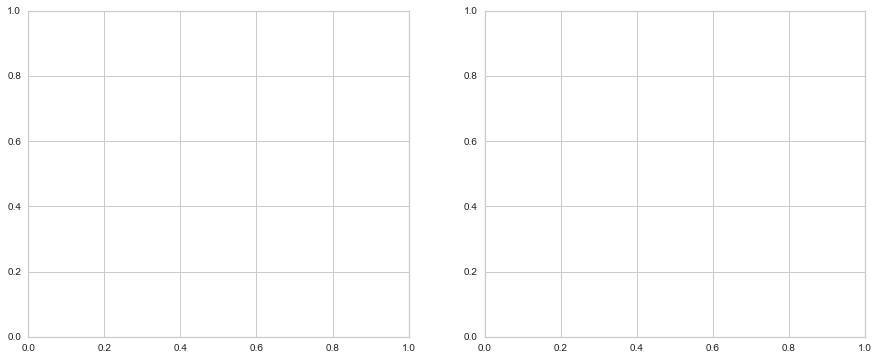

In [160]:
print('model4')
visualizer4.fit(minmax_df)
# fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
# fig.set_size_inches(15,6)
visualizer4.show()
plt.show()

In [142]:
for n_clust in tqdm(list1):
    clust1 = KMeans(n_clusters=n_clust, random_state=0, n_jobs=-1)
    clust_label1 = clust1.fit_predict(pcs_minmax_df)
    silhouette_score2 = silhouette_score(pcs_minmax_df,clust_label1)
    print("For n_clust =", n_clust,"The average silhouette_score is :", silhouette_score2)

For n_clust = 2 The average silhouette_score is : 0.49943893930982836
For n_clust = 3 The average silhouette_score is : 0.43097205149715967
For n_clust = 4 The average silhouette_score is : 0.40565729549340773
For n_clust = 5 The average silhouette_score is : 0.40659824283612717
For n_clust = 6 The average silhouette_score is : 0.3617021569606766
For n_clust = 7 The average silhouette_score is : 0.37251292314756385
For n_clust = 8 The average silhouette_score is : 0.38284127057668565
For n_clust = 9 The average silhouette_score is : 0.391178373548454



In [143]:
#If we check silhouette score with standardize data pca kmeans model 0.36<0.49 So we will PCA which is applied on normalizatied data. Since the score is very less. Best score alwways close to +1.

In [145]:
model1 = KMeans(n_clusters=6, random_state=0,n_jobs=-1)
y_predict1 = model1.fit_predict(pcs_std_df)
y_predict1.shape

(3999,)

In [150]:
y_predict1

array([1, 1, 1, ..., 1, 1, 1])

In [151]:
#y_predict & cluster labels both are same use any one of them to avoid further confusion.
model1.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [152]:
model1.cluster_centers_

array([[ 1.40946275e+00, -1.01129248e+00, -8.23843161e-02,
         9.86412993e-02, -2.56008051e-01, -2.43931657e-01,
        -7.40640231e-02, -1.43349830e-02],
       [-1.03618281e+00,  2.58724341e-01, -1.45470873e-02,
        -8.64531845e-02, -5.37230371e-02,  1.37714954e-01,
         5.73121640e-02, -2.18692957e-03],
       [ 4.25165028e+00,  4.10908160e+00,  1.48662899e-01,
        -2.15415252e-01, -6.18448771e-01,  4.99526780e-01,
        -5.24799096e-02,  1.44221559e-01],
       [ 1.00930830e+00,  1.64553073e+00, -3.00204858e+00,
        -1.50525621e+00,  4.87613963e+00, -2.83327858e+00,
        -8.15524057e-01, -2.42368955e-02],
       [ 4.76675141e-02,  1.06794180e+00,  3.90187367e+00,
         7.28531492e+00,  3.55053601e+00, -6.82561937e-01,
         2.01781543e-01,  2.39276034e-01],
       [ 4.35245436e+00, -3.63296061e+00,  8.67825558e+00,
        -7.27101378e+00,  7.22379804e+00,  6.82996771e+00,
         1.09780252e-01, -3.57742407e-01]])

In [ ]:
# within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

In [153]:
model1.inertia_

16718.396765236546

In [154]:
model1.score(pcs_std_df) 

-16718.396765236543

In [155]:
model1.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 6,
 'n_init': 10,
 'n_jobs': -1,
 'precompute_distances': 'deprecated',
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

In [156]:
#visualizing silhoutte score..for different cluster
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
sil_visualizer1 = SilhouetteVisualizer(model1,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a','#a83232','#323aa8'])
sil_visualizer1.fit(pca_std_df)

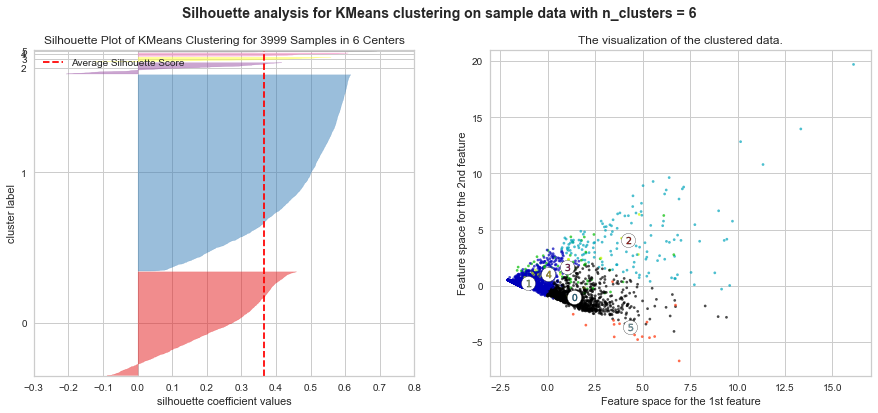

In [167]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
fig.set_size_inches(15, 6)
sil_visul = SilhouetteVisualizer(model1, ax=ax1)
sil_visul.fit(pcs_std_df)

# 2nd Plot showing the actual clusters formed
import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model1.labels_.astype(float) /
                           6)  # 6 is number of clusters
ax2.scatter(pcs_std_df[:, 0],
            pcs_std_df[:, 1],
            marker='.',
            s=30,
            lw=0,
            alpha=0.7,
            c=colors1,
            edgecolor='k')
# Labeling the clusters
centers1 = model1.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0],
            centers1[:, 1],
            marker='o',
            c="white",
            alpha=1,
            s=200,
            edgecolor='k')

for i, c in tqdm(enumerate(centers1)):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

ax2.set_title(label="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % 6),
             fontsize=14,
             fontweight='bold')

sil_visul.show()
plt.show()

In [176]:
# color = cm.nipy_spectral(EastWestAirline)

In [177]:
# plt.scatter(EastWestAirline['Days_since_enroll'],EastWestAirline['Flight_miles_12mo'],
            
#             marker='.',
#             s=30,
#             lw=0,
#             alpha=0.7,
#             c=colors1,
#             edgecolor='k')

In [178]:
#Putting Cluster lables into original dataset And analysis of the same.
# Creating dataframe of cluster lables..

KMeans_cluster = pd.DataFrame(model1.labels_.copy(), columns=['Kmeans_Clustering'])

In [182]:
KMeans_df = pd.concat([EastWestAirline,KMeans_cluster],axis=1)

In [183]:
KMeans_df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_Clustering
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [185]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster
KMeans_df.groupby(['Kmeans_Clustering']).count()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Kmeans_Clustering,,,,,,,,,,,,
0,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293
1,2448,2448,2448,2448,2448,2448,2448,2448,2448,2448,2448,2448
2,141,141,141,141,141,141,141,141,141,141,141,141
3,59,59,59,59,59,59,59,59,59,59,59,59
4,43,43,43,43,43,43,43,43,43,43,43,43
5,15,15,15,15,15,15,15,15,15,15,15,15


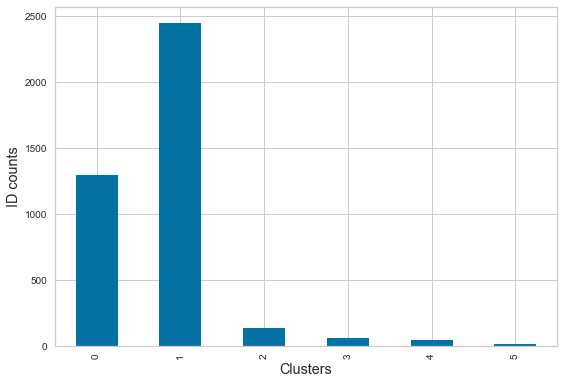

In [195]:
KMeans_df.groupby(['Kmeans_Clustering']).count()['ID'].plot(kind = 'bar')
plt.xlabel('Clusters', fontsize='large')
plt.ylabel('ID counts', fontsize='large')
plt.tight_layout()

In [ ]:
#In cluster number 0 & 1 there are more customers. Need to focus on cluster 0 & 1.

In [197]:
KMeans_df.groupby(['Kmeans_Clustering']).count()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Kmeans_Clustering,,,,,,,,,,,,
0,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293
1,2448,2448,2448,2448,2448,2448,2448,2448,2448,2448,2448,2448
2,141,141,141,141,141,141,141,141,141,141,141,141
3,59,59,59,59,59,59,59,59,59,59,59,59
4,43,43,43,43,43,43,43,43,43,43,43,43
5,15,15,15,15,15,15,15,15,15,15,15,15


In [204]:
KMeans_df.to_csv('EWAir_with_clust.csv',sep=' ',index=False)

In [201]:
import os
os.getcwd()

'C:\\Users\\hp'